In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb

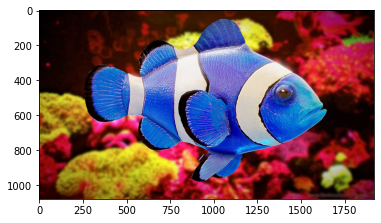

In [2]:
nemo = cv.imread(r".\images\clownfish.jpeg")
plt.imshow(nemo)

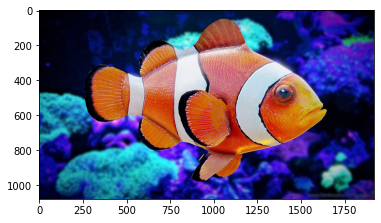

In [3]:
fixed_nemo = cv.cvtColor(nemo, cv.COLOR_BGR2RGB)
plt.imshow(fixed_nemo)

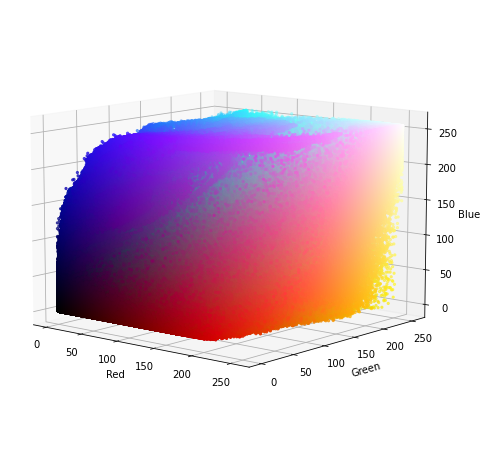

In [4]:
r, g, b = cv.split(fixed_nemo)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d', elev=10, azim=-50)
pixel_colors = fixed_nemo.reshape((np.shape(fixed_nemo)[0] * np.shape(fixed_nemo)[1], 3))
normalization = colors.Normalize(vmin = -1., vmax = 1.)
normalization.autoscale(pixel_colors)
pixel_colors = normalization(pixel_colors).tolist()
ax.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker='.')
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

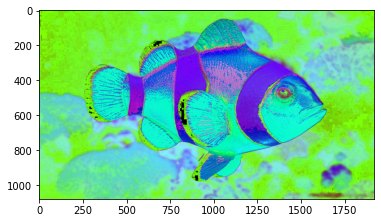

In [5]:
hsv_nemo = cv.cvtColor(fixed_nemo, cv.COLOR_RGB2HSV)
plt.imshow(hsv_nemo)

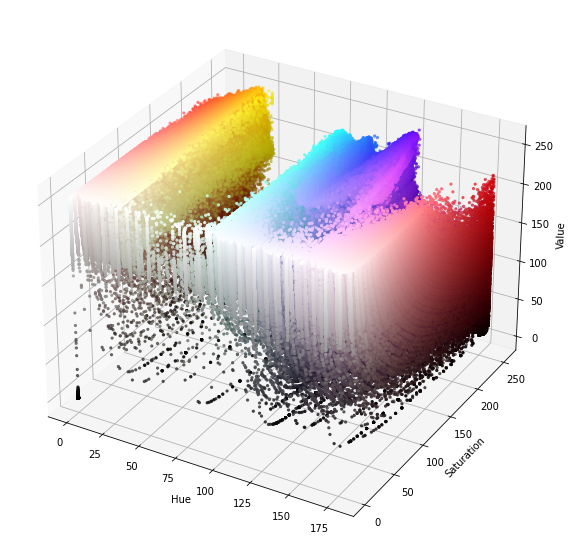

In [6]:
h, s, v = cv.split(hsv_nemo)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter3D(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker='.')
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
plt.show()

In [7]:
light_orange = (1, 60, 90) #16090
dark_orange = (20, 255, 255)

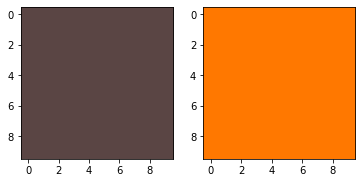

In [8]:
light_orange_square = np.full(( 10, 10, 3), light_orange, dtype=np.uint8 ) / 255.0
dark_orange_square = np.full(( 10, 10, 3), dark_orange, dtype=np.uint8 ) / 255.0

plt.subplot(121)
plt.imshow(hsv_to_rgb(light_orange_square))
plt.subplot(122)
plt.imshow(hsv_to_rgb(dark_orange_square))

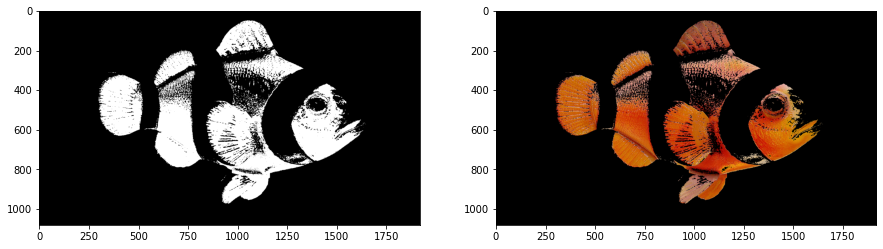

In [9]:
mask = cv.inRange(hsv_nemo, light_orange, dark_orange)
result = cv.bitwise_and(fixed_nemo, fixed_nemo, mask=mask)
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(mask, cmap='gray')
plt.subplot(122)
plt.imshow(result)

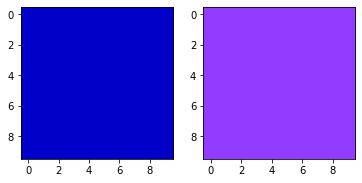

In [10]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

light_white_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dark_white_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(121)
plt.imshow(light_white_square)
plt.subplot(122)
plt.imshow(dark_white_square)

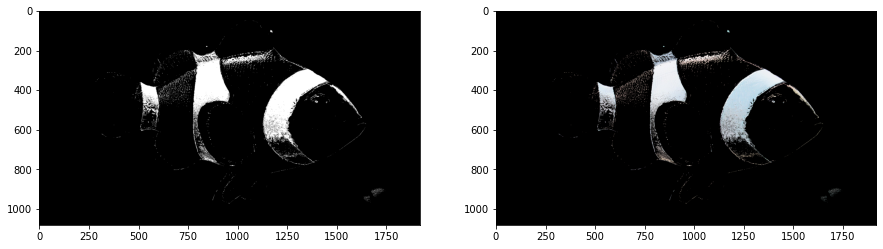

In [11]:
mask_white = cv.inRange(hsv_nemo, light_white, dark_white)
result_white = cv.bitwise_and(fixed_nemo, fixed_nemo, mask=mask_white)
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(mask_white, cmap='gray')
plt.subplot(122)
plt.imshow(result_white)

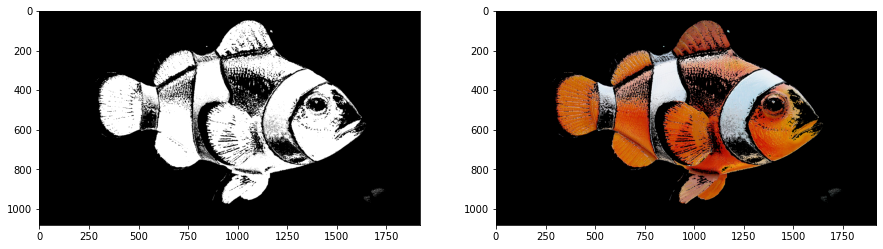

In [12]:
mask_final = mask + mask_white
result_final = cv.bitwise_and(fixed_nemo, fixed_nemo, mask=mask_final)
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(mask_final, cmap='gray')
plt.subplot(122)
plt.imshow(result_final)

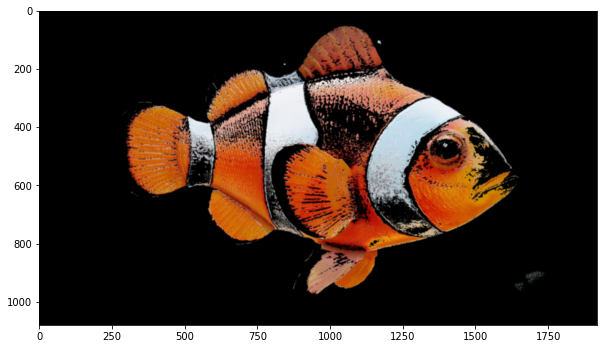

In [13]:
blur = cv.GaussianBlur(result_final, (7, 7), 0)
plt.figure(figsize=(10, 6))
plt.imshow(blur)

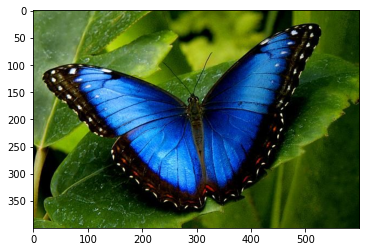

In [14]:
# Butterfly image segmentation
butterfly = cv.imread(r".\i\morpho.jpg")
butterfly_rgb = cv.cvtColor(butterfly, cv.COLOR_RGB2BGR)
plt.imshow(butterfly_rgb)

In [15]:
r, g, b = cv.split(butterfly_rgb)
color_pixels = butterfly_rgb.reshape(( np.shape(butterfly_rgb)[0] * np.shape(butterfly_rgb)[1] ), 3)
normalization = colors.Normalize(vmin = -1., vmax = 1.)
normalization.autoscale(color_pixels)
color_pixels = normalization(color_pixels).tolist()

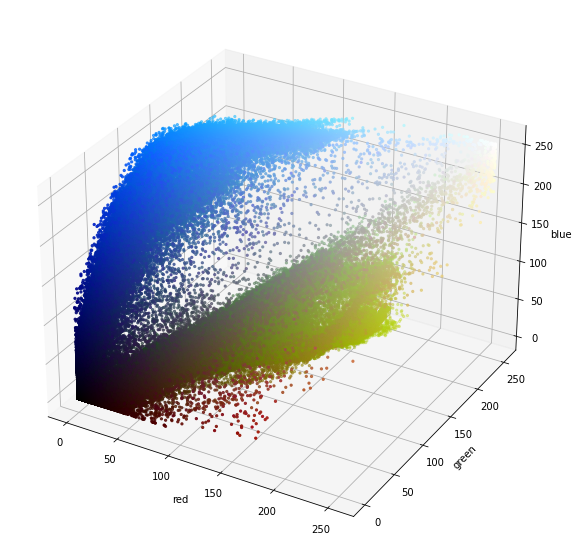

In [16]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=color_pixels, marker='.')
ax.set_xlabel("red")
ax.set_ylabel("green")
ax.set_zlabel("blue")
plt.show()

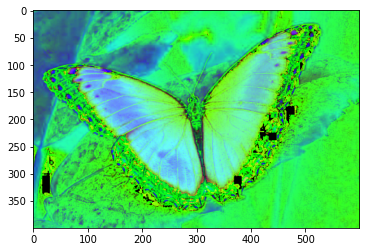

In [17]:
butterfly_hsv = cv.cvtColor(butterfly, cv.COLOR_BGR2HSV)
plt.imshow(butterfly_hsv)

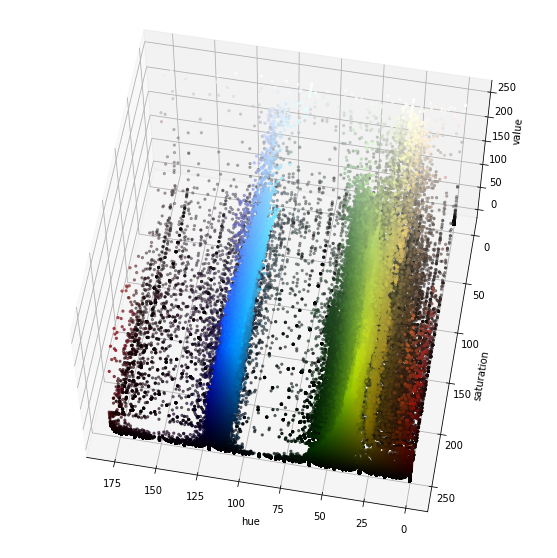

In [18]:
h, s, v = cv.split(butterfly_hsv)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d', elev=60, azim=100) # vertival view elevation = 60 azimut = -90
ax.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=color_pixels, marker='.')
ax.set_xlabel('hue')
ax.set_ylabel('saturation')
ax.set_zlabel('value')
plt.show()

In [19]:
light_blue = (75, 50, 10) 
dark_blue = (140, 255, 255)
light_red = (0, 0, 0)
dark_red = (15, 255, 255)

In [20]:
mask_blue = cv.inRange(butterfly_hsv, light_blue, dark_blue)
result_blue = cv.bitwise_and(butterfly_rgb, butterfly_rgb, mask=mask_blue)
mask_red = cv.inRange(butterfly_hsv, light_red, dark_red)
result_red = cv.bitwise_and(butterfly_rgb, butterfly_rgb, mask=mask_red)

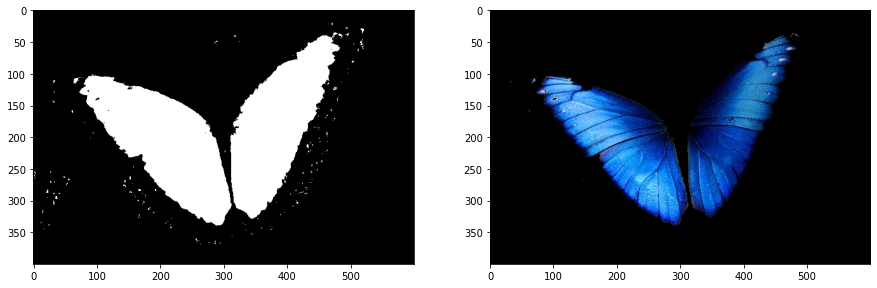

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(mask_blue, cmap='gray')
plt.subplot(122)
plt.imshow(result_blue)

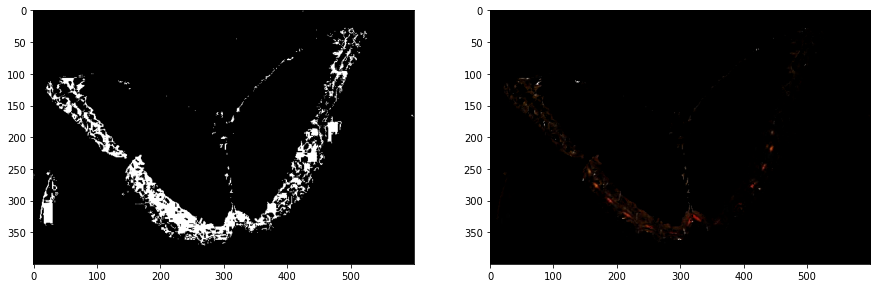

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(mask_red, cmap="gray")
plt.subplot(122)
plt.imshow(result_red)

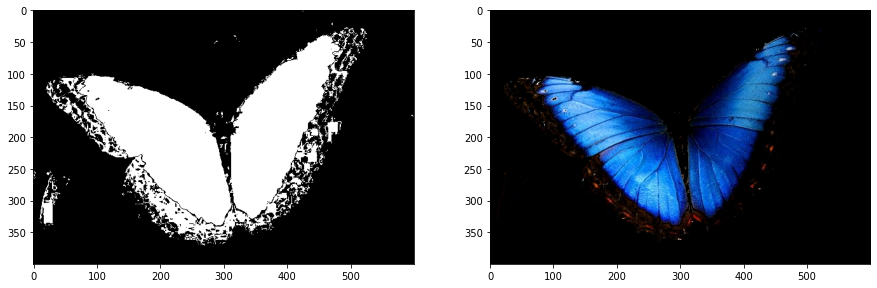

In [23]:
mask_final = mask_blue + mask_red
result = cv.bitwise_and(butterfly_rgb, butterfly_rgb, mask=mask_final)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(mask_final, cmap='gray')
plt.subplot(122)
plt.imshow(result)

In [24]:
# Mask color squares  
light_blue_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255
dark_blue_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255
light_red_square = np.full((10, 10, 3), light_red, dtype=np.uint8) / 255
dark_red_square = np.full((10, 10, 3), dark_red, dtype=np.uint8) / 255

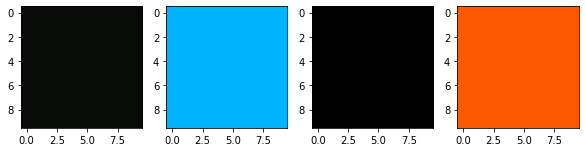

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(141)
plt.imshow(hsv_to_rgb(light_blue_square))
plt.subplot(142)
plt.imshow(hsv_to_rgb(dark_blue_square))
plt.subplot(143)
plt.imshow(hsv_to_rgb(light_red_square))
plt.subplot(144)
plt.imshow(hsv_to_rgb(dark_red_square))